### Imports

In [1]:
import tensorflow
from tensorflow import keras
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
sns.set()

### Dataset

In [2]:
dataset = keras.datasets.fashion_mnist
((imagens_treino, identificacoes_treino),(imagens_teste, identificacoes_teste)) = dataset.load_data()

### Pequena Exploração

In [3]:
print('Número de imagens e tamanhos')
imagens_treino.shape, imagens_teste.shape, imagens_teste.shape, identificacoes_teste.shape

Número de imagens e tamanhos


((60000, 28, 28), (10000, 28, 28), (10000, 28, 28), (10000,))

### Exibição

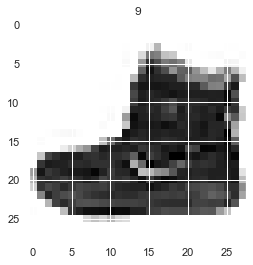

In [4]:
plt.title(identificacoes_treino[0])
plt.imshow(imagens_treino[0], cmap='binary')

In [5]:
print(identificacoes_treino.min(), identificacoes_treino.max())

0 9


In [6]:
# nomes das classificações retiradas do github original do dataset
nomes_classificacoes = ['camiseta','calca', 'pullover','vestido', 
                        'casaco','sandalia','camisa','tenis','bolsa','bota']

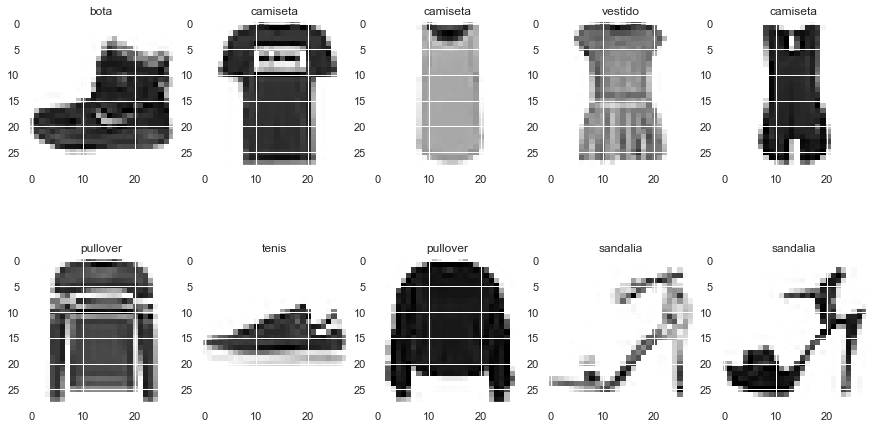

In [7]:
plt.figure(figsize=(15,8))
for imagem in range(10):
    plt.subplot(2,5,imagem+1)
    plt.title(nomes_classificacoes[identificacoes_treino[imagem]])
    plt.imshow(imagens_treino[imagem], cmap='binary')

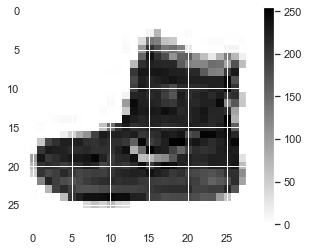

In [8]:
plt.imshow(imagens_treino[0], cmap='binary')
plt.colorbar()

In [9]:
imagens_treino = imagens_treino/255. #normalização

In [10]:
modelo = keras.Sequential([
    keras.layers.Flatten(input_shape = (28,28)),
    keras.layers.Dense(256, activation=tensorflow.nn.relu),
    keras.layers.Dense(10, activation=tensorflow.nn.softmax)
])

In [11]:
modelo.compile(optimizer='adam', 
            loss='sparse_categorical_crossentropy',
            metrics=['accuracy'])

In [12]:
historico = modelo.fit(imagens_treino, identificacoes_treino, epochs=5, batch_size=1,validation_split=0.2)

Epoch 1/5
48000/48000 [==============================] - 85s 2ms/step - loss: 0.5218 - accuracy: 0.8138 - val_loss: 0.4336 - val_accuracy: 0.8425
Epoch 2/5
48000/48000 [==============================] - 87s 2ms/step - loss: 0.4298 - accuracy: 0.8496 - val_loss: 0.4315 - val_accuracy: 0.8545
Epoch 3/5
48000/48000 [==============================] - 84s 2ms/step - loss: 0.4032 - accuracy: 0.8616 - val_loss: 0.4200 - val_accuracy: 0.8597
Epoch 4/5
48000/48000 [==============================] - 98s 2ms/step - loss: 0.3882 - accuracy: 0.8674 - val_loss: 0.4100 - val_accuracy: 0.8691
Epoch 5/5
48000/48000 [==============================] - 115s 2ms/step - loss: 0.3775 - accuracy: 0.8713 - val_loss: 0.4236 - val_accuracy: 0.8635


In [13]:
historico.history

{'loss': [0.5218235850334167,
  0.4297958314418793,
  0.4032292366027832,
  0.3882133662700653,
  0.37752965092658997],
 'accuracy': [0.8138124942779541,
  0.8496041893959045,
  0.8615624904632568,
  0.8674166798591614,
  0.8713124990463257],
 'val_loss': [0.4336166977882385,
  0.43146541714668274,
  0.41995108127593994,
  0.40995901823043823,
  0.4236396849155426],
 'val_accuracy': [0.8424999713897705,
  0.8544999957084656,
  0.859666645526886,
  0.8690833449363708,
  0.8634999990463257]}

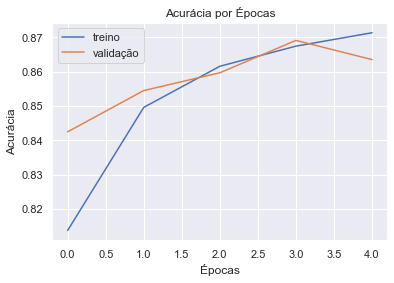

In [14]:
plt.title('Acurácia por Épocas')
plt.plot(historico.history['accuracy'], label='treino')
plt.plot(historico.history['val_accuracy'], label='validação')
plt.ylabel('Acurácia')
plt.xlabel('Épocas')
plt.legend()

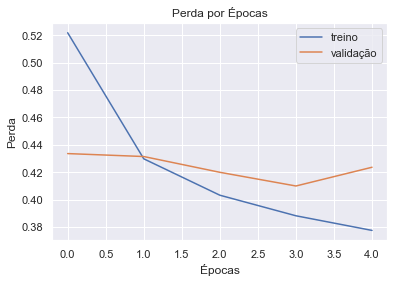

In [15]:
plt.title('Perda por Épocas')
plt.plot(historico.history['loss'], label='treino')
plt.plot(historico.history['val_loss'], label='validação')
plt.ylabel('Perda')
plt.xlabel('Épocas')
plt.legend()

In [16]:
testes = modelo.predict(imagens_teste)

In [17]:
elemento = 1
print(f'resultado teste {np.argmax(testes[elemento])}')
print(f'número da imagem de teste {identificacoes_teste[elemento]}')

resultado teste 2
número da imagem de teste 2


In [18]:
perda_teste, acuracia_teste = modelo.evaluate(imagens_teste, identificacoes_teste, batch_size=1)
print(f'perda do teste: {perda_teste}')
print(f'acuracia do teste: {acuracia_teste}')

10000/10000 [==============================] - 22s 2ms/step - loss: 109.2847 - accuracy: 0.8203
perda do teste: 109.28467559814453
acuracia do teste: 0.8202999830245972
